In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [4]:
data= pd.read_csv('Iris.csv')
df=data.copy()

In [5]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,150.0,75.500000,43.445368,1.0,38.25,75.50,112.75,150.0
SepalLengthCm,150.0,5.843333,0.828066,4.3,5.10,5.80,6.40,7.9
SepalWidthCm,150.0,3.054000,0.433594,2.0,2.80,3.00,3.30,4.4
PetalLengthCm,150.0,3.758667,1.764420,1.0,1.60,4.35,5.10,6.9
PetalWidthCm,150.0,1.198667,0.763161,0.1,0.30,1.30,1.80,2.5


In [8]:
df.shape

(150, 6)

In [9]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [12]:
df.drop("Id",axis=1,inplace=True)

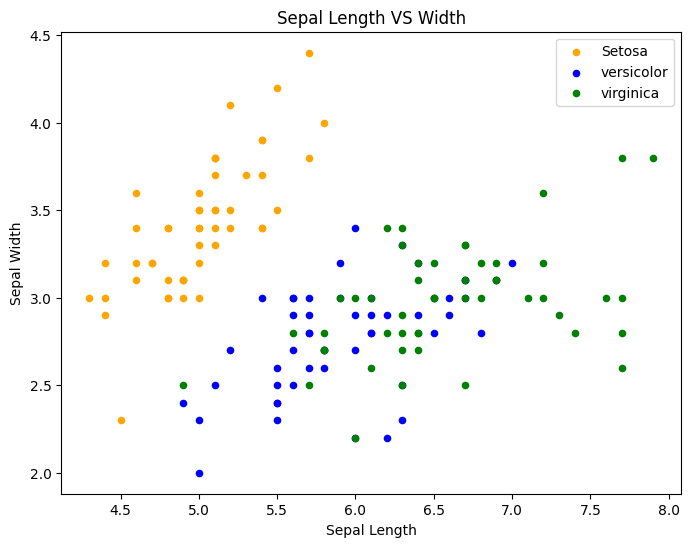

In [23]:
fig = df[df.Species=='Iris-setosa'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='orange', label='Setosa')
df[df.Species=='Iris-versicolor'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='blue', label='versicolor',ax=fig)
df[df.Species=='Iris-virginica'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='green', label='virginica', ax=fig)
fig.set_xlabel("Sepal Length")
fig.set_ylabel("Sepal Width")
fig.set_title("Sepal Length VS Width")
fig=plt.gcf()
fig.set_size_inches(8,6)
plt.show()

In [19]:
df["Species"].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

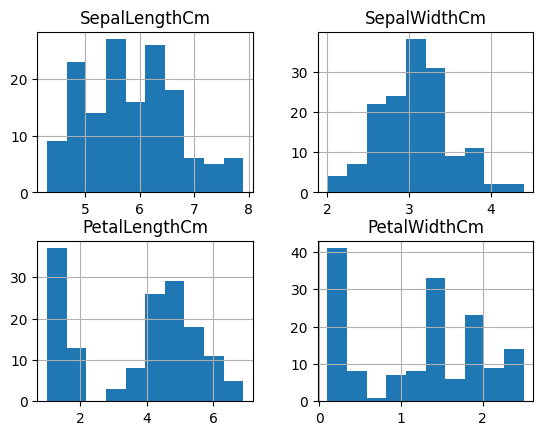

In [24]:
df.hist()
plt.show()

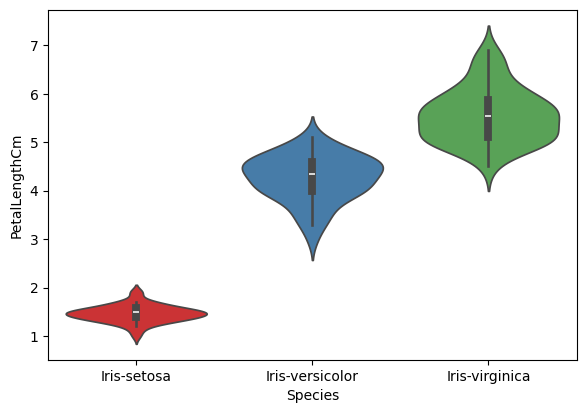

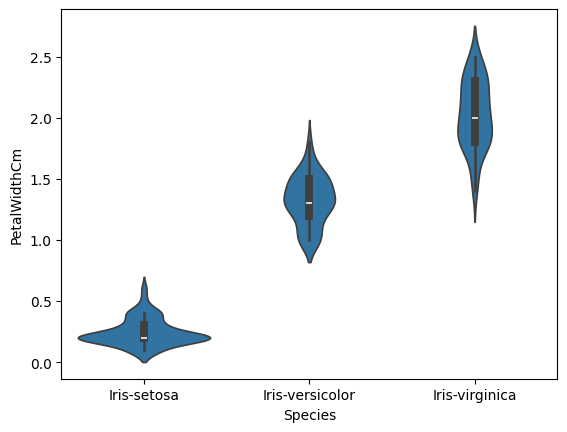

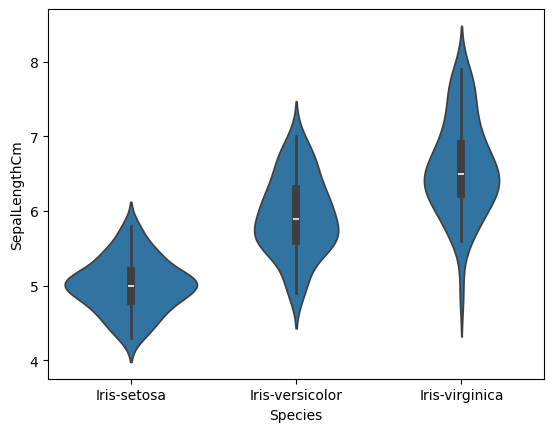

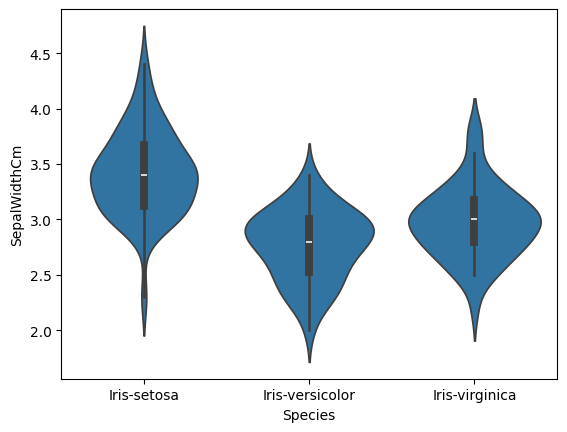

In [29]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x='Species',y='PetalLengthCm',data=df,palette='Set1')
plt.show()
sns.violinplot(x='Species',y='PetalWidthCm',data=df)
plt.show()
sns.violinplot(x='Species',y='SepalLengthCm',data=df)
plt.show()
sns.violinplot(x='Species',y='SepalWidthCm',data=df)
plt.show()

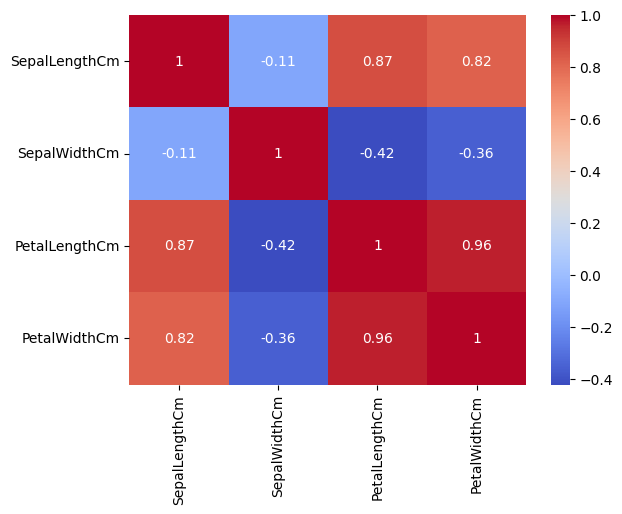

In [31]:
corr=df.corr(numeric_only=True)
sns.heatmap(corr,annot=True,cmap='coolwarm')
plt.show()

In [35]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [36]:
from sklearn.model_selection import train_test_split

In [39]:
X=df.drop(columns=['Species',"SepalWidthCm"],axis=1)
y=df['Species']

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [42]:
from sklearn.neighbors import LocalOutlierFactor

In [80]:
lof=LocalOutlierFactor()
outlier=lof.fit_predict(X)

In [82]:
np.where(outlier==-1)
df.drop(np.where(outlier==-1)[0],axis=0,inplace=True)

In [83]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [84]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(120, 3)
(30, 3)
(120,)
(30,)


In [85]:
modelsvc=SVC()
modelknn=KNeighborsClassifier()
modeldtc=DecisionTreeClassifier()
modelrf=RandomForestClassifier()
modellog=LogisticRegression()

In [86]:
modelsvc.fit(X_train,y_train)
modelknn.fit(X_train,y_train)
modeldtc.fit(X_train,y_train)
modelrf.fit(X_train,y_train)
modellog.fit(X_train,y_train)

LogisticRegression()

In [87]:
print(modelsvc.score(X_train,y_train))
print(modelknn.score(X_train,y_train))
print(modeldtc.score(X_train,y_train))
print(modelrf.score(X_train,y_train))
print(modellog.score(X_train,y_train))

0.9583333333333334
0.9583333333333334
1.0
1.0
0.9666666666666667


In [88]:
print(modelsvc.score(X_test,y_test))
print(modelknn.score(X_test,y_test))
print(modeldtc.score(X_test,y_test))
print(modelrf.score(X_test,y_test))
print(modellog.score(X_test,y_test))

1.0
1.0
1.0
1.0
1.0


In [89]:
print(metrics.accuracy_score(modelsvc.predict(X_test),y_test))
print(metrics.accuracy_score(modelknn.predict(X_test),y_test))
print(metrics.accuracy_score(modeldtc.predict(X_test),y_test))
print(metrics.accuracy_score(modelrf.predict(X_test),y_test))
print(metrics.accuracy_score(modellog.predict(X_test),y_test))

1.0
1.0
1.0
1.0
1.0


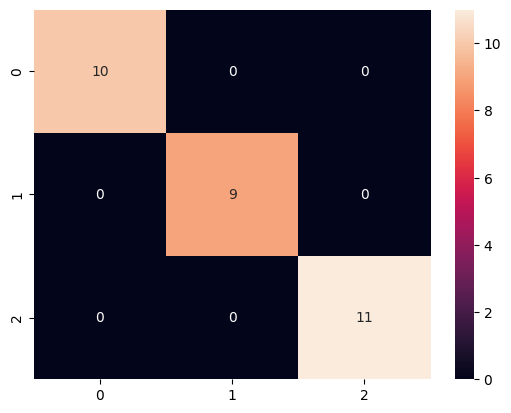

In [90]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,modeldtc.predict(X_test))
sns.heatmap(cm,annot=True)
plt.show()

In [91]:
y_pred=modeldtc.predict(X_test)

In [92]:
pd.DataFrame({'Actual':y_test,'Predicted':y_pred})

,Actual,Predicted
73,Iris-versicolor,Iris-versicolor
18,Iris-setosa,Iris-setosa
118,Iris-virginica,Iris-virginica
78,Iris-versicolor,Iris-versicolor
76,Iris-versicolor,Iris-versicolor
31,Iris-setosa,Iris-setosa
64,Iris-versicolor,Iris-versicolor
141,Iris-virginica,Iris-virginica
68,Iris-versicolor,Iris-versicolor
82,Iris-versicolor,Iris-versicolor
